## Importing relevant libraries

In [30]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns

### Auxilliary Settings

In [31]:
import warnings

warnings.filterwarnings("ignore")

sns.set_style(style="whitegrid")

In [56]:
df = pd.read_csv(".\\Datasets\\synthetic_fraud_dataset.csv")

df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Timestamp,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,...,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,2023-08-14 19:30:00,93213.17,Laptop,Sydney,Travel,0,...,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,2023-06-07 04:01:00,75725.25,Mobile,New York,Clothing,0,...,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,2023-06-20 15:25:00,1588.96,Tablet,Mumbai,Restaurants,0,...,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,2023-12-07 00:31:00,76807.20,Tablet,New York,Clothing,0,...,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,2023-11-11 23:44:00,92354.66,Mobile,Mumbai,Electronics,0,...,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 21 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Timestamp                     50000 non-null  object 
 5   Account_Balance               50000 non-null  float64
 6   Device_Type                   50000 non-null  object 
 7   Location                      50000 non-null  object 
 8   Merchant_Category             50000 non-null  object 
 9   IP_Address_Flag               50000 non-null  int64  
 10  Previous_Fraudulent_Activity  50000 non-null  int64  
 11  Daily_Transaction_Count       50000 non-null  int64  
 12  Avg_Transaction_Amount_7d     50000 non-null  float64
 13  F

In [34]:
df["Fraud_Label"].value_counts()

Fraud_Label
0    33933
1    16067
Name: count, dtype: int64

In [35]:
df.shape

(50000, 21)

In [36]:
fraud_ratio = 100 * df["Fraud_Label"].value_counts()[1] / df.shape[0]

print(fraud_ratio)

32.134


<Axes: title={'center': 'Transaction Type'}, xlabel='Transaction_Type'>

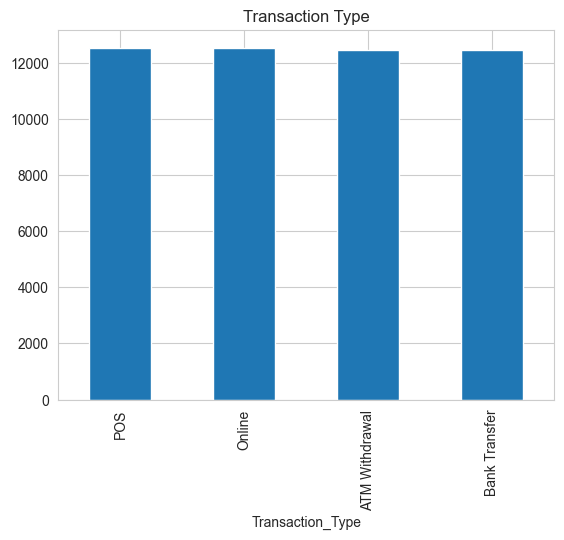

In [37]:
df["Transaction_Type"].value_counts().plot(kind="bar", title="Transaction Type")
# plt.xlabel("Type")
# plt.ylabel("Count")
# plt.show()

<Axes: title={'center': 'Fraud Rate by Transaction Type'}, xlabel='Type', ylabel='Fraud Rates'>

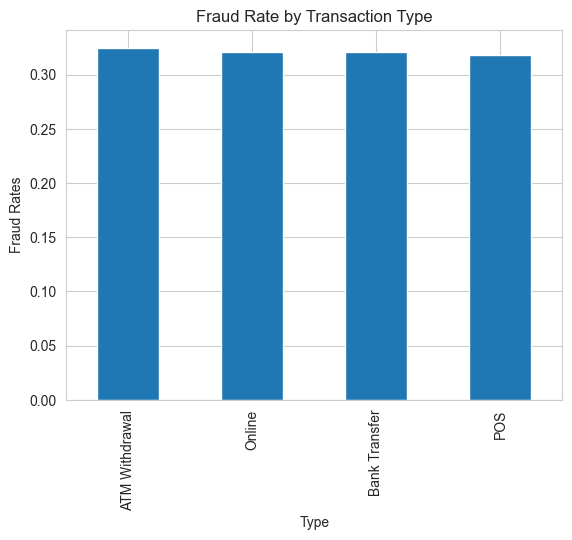

In [38]:
fraud_by_type = df.groupby("Transaction_Type")['Fraud_Label'].mean().sort_values(ascending=False)

fraud_by_type.plot(kind="bar", title="Fraud Rate by Transaction Type", ylabel="Fraud Rates", xlabel="Type")

In [39]:
df['Transaction_Amount'].describe().astype(int)

count    50000
mean        99
std         98
min          0
25%         28
50%         69
75%        138
max       1174
Name: Transaction_Amount, dtype: int32

<Axes: xlabel='Transaction_Amount', ylabel='Count'>

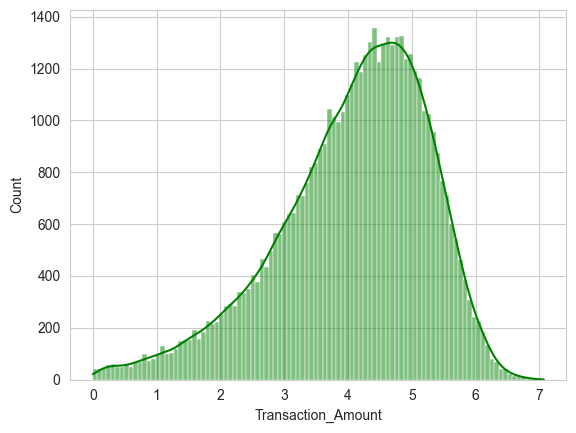

In [40]:
sns.histplot(np.log1p(df["Transaction_Amount"]), bins=100, kde=True, color='green')
# plt.title("Transaction Amount Distribution (log scale)")
# plt.xlabel("log(Amount + 1)")
# plt.show()

<Axes: xlabel='Fraud_Label', ylabel='Transaction_Amount'>

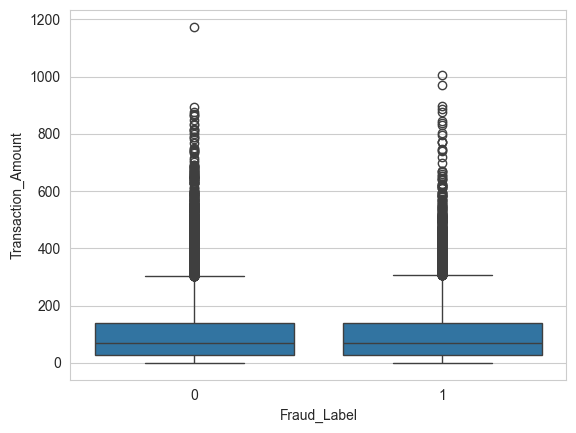

In [41]:
sns.boxplot(data= df[df["Transaction_Amount"] < 50000], x="Fraud_Label", y="Transaction_Amount")


There are huge number of outliers in the data.

In [42]:
df.columns.to_list()

['Transaction_ID',
 'User_ID',
 'Transaction_Amount',
 'Transaction_Type',
 'Timestamp',
 'Account_Balance',
 'Device_Type',
 'Location',
 'Merchant_Category',
 'IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Daily_Transaction_Count',
 'Avg_Transaction_Amount_7d',
 'Failed_Transaction_Count_7d',
 'Card_Type',
 'Card_Age',
 'Transaction_Distance',
 'Authentication_Method',
 'Risk_Score',
 'Is_Weekend',
 'Fraud_Label']

In [43]:
df["Daily_Transaction_Count"].value_counts()

Daily_Transaction_Count
3     3634
10    3623
11    3620
4     3606
2     3605
1     3598
12    3586
5     3582
7     3574
14    3571
9     3538
13    3524
6     3521
8     3418
Name: count, dtype: int64

In [44]:
fraud_users = df[df['Fraud_Label'] == 1]['User_ID'].value_counts().head(10)

In [45]:
fraud_users

User_ID
USER_7026    8
USER_6179    7
USER_2403    7
USER_1560    7
USER_3800    7
USER_9983    7
USER_7473    7
USER_1689    7
USER_2268    7
USER_3933    7
Name: count, dtype: int64

In [46]:
df.drop(columns="Timestamp", inplace=True)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Transaction_ID                50000 non-null  object 
 1   User_ID                       50000 non-null  object 
 2   Transaction_Amount            50000 non-null  float64
 3   Transaction_Type              50000 non-null  object 
 4   Account_Balance               50000 non-null  float64
 5   Device_Type                   50000 non-null  object 
 6   Location                      50000 non-null  object 
 7   Merchant_Category             50000 non-null  object 
 8   IP_Address_Flag               50000 non-null  int64  
 9   Previous_Fraudulent_Activity  50000 non-null  int64  
 10  Daily_Transaction_Count       50000 non-null  int64  
 11  Avg_Transaction_Amount_7d     50000 non-null  float64
 12  Failed_Transaction_Count_7d   50000 non-null  int64  
 13  C

In [48]:
# Correlation matrix
df_corr = df[['Transaction_Amount',
 'Account_Balance',
 'IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Daily_Transaction_Count',
 'Avg_Transaction_Amount_7d',
 'Failed_Transaction_Count_7d',
 'Card_Age',
 'Transaction_Distance',
 'Risk_Score',
 'Is_Weekend',
 'Fraud_Label']].corr()


print(df_corr)

                              Transaction_Amount  Account_Balance  \
Transaction_Amount                      1.000000        -0.002380   
Account_Balance                        -0.002380         1.000000   
IP_Address_Flag                        -0.001620        -0.001210   
Previous_Fraudulent_Activity            0.001668        -0.002314   
Daily_Transaction_Count                 0.002149         0.006041   
Avg_Transaction_Amount_7d              -0.006255        -0.001738   
Failed_Transaction_Count_7d             0.001247        -0.000186   
Card_Age                                0.002294         0.000717   
Transaction_Distance                    0.007935         0.001748   
Risk_Score                              0.005606        -0.005262   
Is_Weekend                              0.001348         0.000557   
Fraud_Label                             0.001901        -0.003153   

                              IP_Address_Flag  Previous_Fraudulent_Activity  \
Transaction_Amount     

<Axes: >

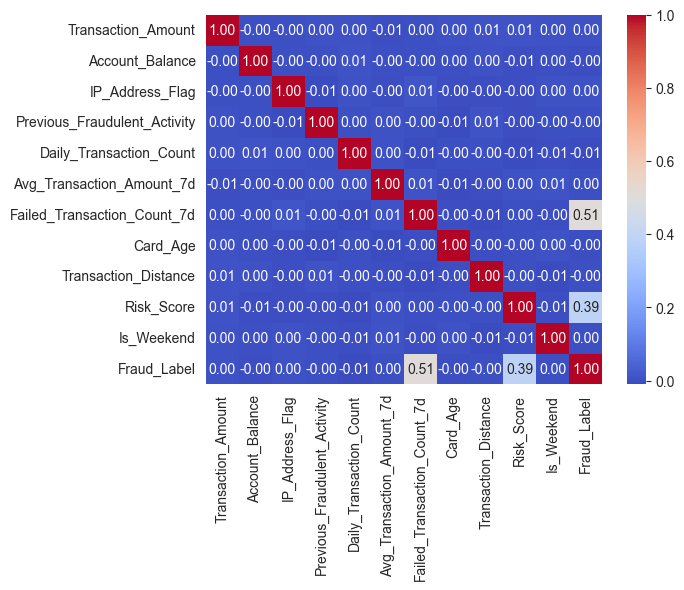

In [49]:
# visualizing the correlation matrix with heat maps
sns.heatmap(data=df_corr, annot=True, cmap="coolwarm", fmt=".2f")

## FEATURE SELECTION

In [50]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [51]:
df.head()

,Transaction_ID,User_ID,Transaction_Amount,Transaction_Type,Account_Balance,Device_Type,Location,Merchant_Category,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Type,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Is_Weekend,Fraud_Label
0,TXN_33553,USER_1834,39.79,POS,93213.17,Laptop,Sydney,Travel,0,0,7,437.63,3,Amex,65,883.17,Biometric,0.8494,0,0
1,TXN_9427,USER_7875,1.19,Bank Transfer,75725.25,Mobile,New York,Clothing,0,0,13,478.76,4,Mastercard,186,2203.36,Password,0.0959,0,1
2,TXN_199,USER_2734,28.96,Online,1588.96,Tablet,Mumbai,Restaurants,0,0,14,50.01,4,Visa,226,1909.29,Biometric,0.8400,0,1
3,TXN_12447,USER_2617,254.32,ATM Withdrawal,76807.20,Tablet,New York,Clothing,0,0,8,182.48,4,Visa,76,1311.86,OTP,0.7935,0,1
4,TXN_39489,USER_2014,31.28,POS,92354.66,Mobile,Mumbai,Electronics,0,1,14,328.69,4,Mastercard,140,966.98,Password,0.3819,1,1


In [ ]:
df_model_data = df.drop(['Transaction_ID',
 'User_ID',
 'Device_Type',
 'Location',
 'Merchant_Category',
 'Card_Type',
 'Is_Weekend'], axis=1)


In [53]:
df_model_data.head()

,Transaction_Amount,Transaction_Type,Account_Balance,IP_Address_Flag,Previous_Fraudulent_Activity,Daily_Transaction_Count,Avg_Transaction_Amount_7d,Failed_Transaction_Count_7d,Card_Age,Transaction_Distance,Authentication_Method,Risk_Score,Fraud_Label
0,39.79,POS,93213.17,0,0,7,437.63,3,65,883.17,Biometric,0.8494,0
1,1.19,Bank Transfer,75725.25,0,0,13,478.76,4,186,2203.36,Password,0.0959,1
2,28.96,Online,1588.96,0,0,14,50.01,4,226,1909.29,Biometric,0.8400,1
3,254.32,ATM Withdrawal,76807.20,0,0,8,182.48,4,76,1311.86,OTP,0.7935,1
4,31.28,POS,92354.66,0,1,14,328.69,4,140,966.98,Password,0.3819,1


In [54]:
df_model_data.columns.to_list()

['Transaction_Amount',
 'Transaction_Type',
 'Account_Balance',
 'IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Daily_Transaction_Count',
 'Avg_Transaction_Amount_7d',
 'Failed_Transaction_Count_7d',
 'Card_Age',
 'Transaction_Distance',
 'Authentication_Method',
 'Risk_Score',
 'Fraud_Label']

In [55]:
categorical = ['Transaction_Type', 'Authentication_Method']
numerical = ['Transaction_Amount',
 'Account_Balance',
 'IP_Address_Flag',
 'Previous_Fraudulent_Activity',
 'Daily_Transaction_Count',
 'Avg_Transaction_Amount_7d',
 'Failed_Transaction_Count_7d',
 'Card_Age',
 'Transaction_Distance',
 'Risk_Score',
 'Fraud_Label']

In [ ]:
y = df_model_data['Fraud_Label']
x = df_model_data.drop('Fraud_Label', axis=1)